---
<a name="contents-table"></a>

# Contents

### <a href="#ch1.1">Chapter 1.1:</a> Systems of Linear Equations

### <a href="#ch1.2">Chapter 1.2:</a> Vectors
* <a href="#ch1.2.1">1.2.1</a> Vector Addition
* <a href="#ch1.2.2">1.2.2</a> Scalar-Vector Multiplication
* <a href="#ch1.2.3">1.2.3</a> Dot Product

### <a href="#ch1.3">Chapter 1.3:</a> Matrices
* <a href="#ch1.3.1">1.3.1</a> Matrix Addition
* <a href="#ch1.3.2">1.3.2</a> Scalar-Matrix Multiplication
* <a href="#ch1.3.3">1.3.3</a> Indexing a Matrix
* <a href="#ch1.3.4">1.3.4</a> Setting Values in a Matrix
* <a href="#ch1.3.5">1.3.5</a> Matrix Transpose


### <a href="#ch1.4">Chapter 1.4:</a> Matrix Multiplication

### <a href="#"></a>


In [1]:
from sympy import *
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

---
<a name="ch1.1"></a>
#### <a href="#contents-table">Back to Contents</a>
# Ch 1.1: Systems of Linear Equations

# Challenges

**`Solve`** the following systems of linear equations.

***`Hint:`*** You can use python to solve these, but to start it may be easier to solve them by hand.

#### Equations 1)

$$
\begin{align}
& x + 2y = 3 \\
& 4x + 5y = 6 \\
\end{align}
$$

---
$$
\begin{align}
\text{Your solution:} & \\
& ... \\
& \\
& \\
\end{align}
$$

In [2]:
# your code here

---
#### Equations 2)

$$
\begin{align}
& x + 2y + 3z =  4 \\
& 4x + 5y + 6z = 4 \\
& 7x + 9z = 4 \\ 
\end{align}
$$

---
$$
\begin{align}
\text{Your solution:} & \\
& ... \\
& \\
& \\
\end{align}
$$

In [3]:
# your code here

#### Equations 3)

$$
\begin{align}
& x_1 + 2x_3 = 7 \\
& x_1 + 2x_2 + x_3 + x_4 = -4 \\
& x_2 + 3x_3 = 7 \\
& 2x_1 + 2x_3 + 3x_4 = -8 \\
\end{align}
$$

---
$$
\begin{align}
\text{Your solution:} & \\
& ... \\
& \\
& \\
\end{align}
$$

---
# <span style="color:red;">Solutions<span>

#### Systems 1)

$$
\begin{align}
\text{eq 1:}\quad & x + 2y = 3 \\
\text{eq 2:}\quad & 4x + 5y = 6 \\
\\\\
\text{Steps:}\\
\text{eq 1:}\quad & x = 3 - 2y \quad\text{<= rearrange}\\
\text{eq 2:}\quad & 4(3 - 2y) + 5y = 6 \quad\text{<= substitution}\\
\\
& 12 - 8y + 5y = 6 \\
& -3y = -6 \\
& => y = 2 \\
\\
& => x = 3 - 2(2)= -1 \\
\\
\text{Solution:}\\
& x = -1, y = 2
\end{align}
$$

#### Systems 2)

$$
\begin{align}
\text{eq 1:}\quad &  x + 2y + 3z = 4 \\
\text{eq 2:}\quad & 4x + 5y + 6z = 4 \\
\text{eq 3:}\quad & 7x + 9z = 4 \\
\\\\
\text{Steps:}\\
\text{eq 3:}\quad & 7x + 9z = 4 \\
=> \, & z = \frac{4-7x}{9} \\
\text{eq 1:}\quad & x + 2y + 3z = 4 \\
& x + 2y + 3\frac{4-7x}{9} = 4 \\
& 2y + \frac{4 + 3x-7x}{3} = 4 \\
& 2y = \, 4 -\frac{4-4x}{3}  \\
& y = \, 2 -\frac{2-2x}{3}  \\
=> \, & y = \frac{4-2x}{3}  \\
\end{align}
$$

In [4]:

def to_rre(eqs, show=True):
    
    # print steps if show
    if show:
        def print_if(*args, **kwargs):
            print(*args, **kwargs)
    else:
        def print_if(*args, **kwargs):
            pass

    # show original
    print_if('Original Matrix:')
    print_if('='*15, '\n')
    print_if('\n'.join([str(row) for row in eqs]), '\n')

    # row echelon form
    print_if('Row-Echelon Form:')

    # row-echelon form
    for j in range(len(eqs)):

        print_if('-'*15, '\n')
        
        # "pivot" value
        v = eqs[j][j]

        # if not zero
        if v != 0:
            # divide trace row by itself
            eqs[j] = [x/v for x in eqs[j]]

        print_if('\n'.join([str(row) for row in eqs]), '\n')

        for i in range(j+1, len(eqs)):

            # value on the same column
            m = eqs[i][j]

            # replace row with cancellation
            eqs[i] = [y-(m*x) for y,x in zip(eqs[i], eqs[j])]

            print_if('\n'.join([str(row) for row in eqs]) , '\n')


    # reduce row-echelon form
    print_if('Reduced Row-Echelon Form:')
    print_if('='*15, '\n')
    
    for i in range(len(eqs)):
        
        # negative indexing
        this = len(eqs)-1-i

        # "pivot" value
        v = eqs[this][this]
        
        # if not value
        if v != 0:

            for j in range(i, len(eqs)-1):

                prev = len(eqs)-2-j

                m = eqs[prev][this] / v

                eqs[prev] = [y - m*x for y, x in zip(eqs[prev], eqs[this])]

                print_if('\n'.join([str(row) for row in eqs]) , '\n')
                
    return eqs

In [5]:
eqs1 = [
    [1, 2,    3],
    [4, 5,    6],
]

np.array(to_rre(eqs1, show=True))

Original Matrix:

[1, 2, 3]
[4, 5, 6] 

Row-Echelon Form:
--------------- 

[1.0, 2.0, 3.0]
[4, 5, 6] 

[1.0, 2.0, 3.0]
[0.0, -3.0, -6.0] 

--------------- 

[1.0, 2.0, 3.0]
[-0.0, 1.0, 2.0] 

Reduced Row-Echelon Form:

[1.0, 0.0, -1.0]
[-0.0, 1.0, 2.0] 



array([[ 1.,  0., -1.],
       [-0.,  1.,  2.]])

In [6]:
eqs2 = [
    [1,  2,  3,    4],
    [4,  5,  6,    4],
    [7,  0,  9,    4],
]

np.array(to_rre(eqs2, show=False))

array([[ 1.,  0.,  0., -2.],
       [-0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  2.]])

In [7]:
eqs3 = [
    [1,  0,  2,  0,    7],
    [1,  2,  1,  1,   -4],
    [0,  1,  3,  0,    7],
    [2,  0,  2,  4,   -8],
]

np.array(to_rre(eqs3, show=False))

array([[ 1.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0., -2.],
       [ 0.,  0.,  1.,  0.,  3.],
       [ 0.,  0.,  0.,  1., -4.]])

---
<a name="ch1.2"></a>
#### <a href="#contents-table">Back to Contents</a>
# Ch 1.2: Vectors

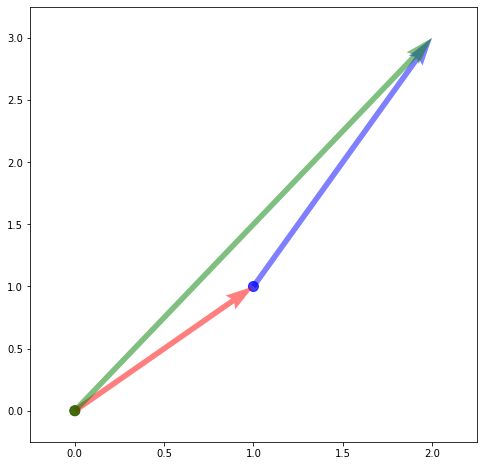

In [8]:
# origin
v0 = np.array([0, 0])

# vectors
v1 = np.array([1, 1])
v2 = np.array([1, 2])

# all vectors
V = np.array([v1, v2, v1 + v2])

# starting points
origins = np.array([v0, v1, v0])

colors = ['r', 'b', 'g']

plt.figure(figsize=(8, 8))

plt.quiver(*origins.T, V.T[0], V.T[1], alpha=0.5,
           color=colors, scale=1, width=0.0125,
           angles='xy', scale_units='xy', zorder=2)

plt.scatter(*origins.T,
            s=100, alpha=0.75,
            c=colors, zorder=1)

plt.xlim(-0.25, 2.25)
plt.ylim(-0.25, 3.25)

plt.show()

---
<a name="ch1.2.1"></a>
#### <a href="#contents-table">Back to Contents</a>
## 1.2.1: Vector Broadcast

Create a **`function`** called `add_vectors()` that takes two (or more) arguments.

Each argument is a `list` (or "vector") of numbers. The vector arguments have the same length. 

The function returns a list containing the element-wise sums of the vectors.

***`e.g.:`***
```python
# example arguments
a = [1, 2, 3]
b = [4, 5, 6]

# result should be:
add_vectors(A, B) == [5, 7, 9] == [1+4, 2+5, 3+6]
```

***`Bonus`*** Allow the function to return the sum of two ***or more*** vectors.

In [9]:
# example arguments
a = [1, 2, 3]
b = [4, 5, 6]

In [10]:
# your code here

---
# <span style="color:red;">Solutions<span>

In [11]:
# Solution ch 1.2.1

def add_vectors(*args):
    
    return [sum(x) for x in zip(*args)]

print(add_vectors(a, b))

[5, 7, 9]


---
<a name="ch1.2.2"></a>
#### <a href="#contents-table">Back to Contents</a>
# 1.2.2: Scalar-Vector Multiplication

Create a **`function`** called `scale_vector()` that takes two arguments:

* **`vector`**: a `list` of numbers

* **`scalar`**: an integer or floating point number

The function returns a list where the elements of the vector multiplied (or "scaled") by the scalar.

***`e.g.:`***
```python
# example arguments
vector = [1, 2, 3]
scalar = 2

# result should be:
scale_vector(vector, scalar) == [2, 4, 6]

```

In [12]:
# example arguments
vector = [1, 2, 3]
scalar = 2

In [13]:
# your code here

---
# <span style="color:red;">Solutions<span>

In [14]:
# Solution ch 1.2.2

def scale_vector(v, s):
    
    return [x*s for x in v]

print(scale_vector(vector, scalar))

[2, 4, 6]


---
<a name="ch1.2.3"></a>
#### <a href="#contents-table">Back to Contents</a>

# Vector Dot Product

Create a **`function`** called `dot_vector()` that takes two arguments.

Each argument is a `list` (or "vector") of numbers. The vector arguments have the same length. 

The function returns the sum of the element-wise products of the vectors.

***`e.g.:`***
```python
# example arguments
a = [1, 2, 3]
b = [4, 5, 6]

# result should be:
dot_vector(a, b) == 32 == (1*4 + 2*5 + 3*6)

```

In [15]:
# example arguments
a = [1, 2, 3]
b = [4, 5, 6]

In [16]:
# your code here

---
# <span style="color:red;">Solutions<span>

In [17]:
# Solution ch 1.2.3

def dot_vector(*args):
    
    res = 0
    for group in zip(*args):
        z = 1
        for x in group:
            z *= x
        res += z
    return res

print(dot_vector(a, b))

32


---
<a name="ch1.3"></a>
#### <a href="#contents-table">Back to Contents</a>
# Ch 1.3: Matrices

### Definitions

Recall in the previous challenge we worked with ***`vectors`***. We now define a vector as a `list` of `numbers`.

```Python
# example vectors of length 3
a = [1, 2, 3]
b = [4, 5, 6]
```

A ***`matrix`*** is constructed from **`row vectors`** or **`column vectors`**. In python, a `matrix` is just a `list` of `row vectors`.

```Python
# example matrix
A = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

# first row
rows[0] == [1, 2, 3]

# first column
columns[0] == [1, 4, 7]
```

---
<a name="ch1.3.1"></a>
#### <a href="#contents-table">Back to Contents</a>

## 3.1: Matrix Addition

Create a **`function`** called `add_matrices()` that returns a matrix containing the element-wise sums of the input matrices.

***`e.g.:`***
```python
# example arguments
A = [[0, 1],
     [2, 3]]

B = [[4, 5],
     [6, 7]]

add_matrices(A, B) == [[4, 6],  == [[0+4, 1+5],
                       [8, 10]]     [2+6, 3+7]]
```

In [18]:
# example arguments
A = [[0, 1],
     [2, 3]]

B = [[4, 5],
     [6, 7]]

In [19]:
# your code here

---
# <span style="color:red;">Solutions<span>

In [20]:
# Solution ch 1.3.1

def add_matrices(*args):
    
    return [add_vectors(*row) for row in zip(*args)]

print(str(add_matrices(A, B)).replace('],', '],\n'))

[[4, 6],
 [8, 10]]


---
<a name="ch1.3.2"></a>
#### <a href="#contents-table">Back to Contents</a>

## 1.3.2 Scalar-Matrix Multiplication

Create a **`function`** called `scale_matrix()` that takes two arguments:

* **`matrix`**: a `list` of vectors

* **`scalar`**: an integer or floating point number

The function returns a matrix where the elements of the input matrix are scaled by the scalar.

***`e.g.:`***
```python
# example arguments
scalar = 2
A = [[0, 1],
     [2, 3]]

# result should be:
scale_matrix(A, scalar) == [[0, 2], == [[2*0, 2*1],
                            [4, 6]]     [2*2, 2*3]]

```

In [21]:
# example arguments
scalar = 2
A = [[0, 1],
     [2, 3]]

In [22]:
# your code here

---
# <span style="color:red;">Solutions<span>

In [23]:
# Solution ch 1.3.2

def scale_matrix(matrix, scalar):
    
    return [scale_vector(row, scalar) for row in matrix]

print(str(scale_matrix(A, scalar)).replace('],', '],\n'))

[[0, 2],
 [4, 6]]


---
<a name="ch1.3.3"></a>
#### <a href="#contents-table">Back to Contents</a>

# 1.3.3 Indexing a Matrix
Create a **`function`** called `index()` which takes three arguments:

* **`m`**: a matrix

* **`i`**: an integer

* **`j`**: an integer

The function returns the value of the element within the matrix `m` at row `i` and column `j`.

```Python
# example matrix
A = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

# results:
index(m=A, i=0, j=0) == 1

index(m=A, i=2, j=2) == 9
```

In [24]:
# example matrix
A = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

In [25]:
# your code here

---
# <span style="color:red;">Solutions<span>

In [26]:
# Solution ch 1.3.3

def index(m, i, j):
    
    return m[i][j]

print(index(A, 0, 0))
print(index(A, 2, 2))

1
9


---
<a name="ch1.3.4"></a>
#### <a href="#contents-table">Back to Contents</a>

# 1.3.4 Setting Values in a Matrix
Create a **`function`** called `set_value()` which takes four arguments:

* **`m`**: a matrix

* **`i`**: an integer

* **`j`**: an integer

* **`v`**: an integer or float (can be any value really)

The function returns a `matrix` resulting from changing the value of the element at row `i` and column `j` to `v` within matrix `m`.

```Python
# example matrix
A = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

# results:
set_value(m=A, i=0, j=0, v=0) == [[0, 2, 3],
                                  [4, 5, 6],
                                  [7, 8, 9]]

set_value(m=A, i=2, j=2, v=0) == [[1, 2, 3],
                                  [4, 5, 6],
                                  [7, 8, 0]]
```

In [27]:
# example matrix
A = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

In [28]:
# your code here

---
# <span style="color:red;">Solutions<span>

In [29]:
# Solution ch 1.3.4

def set_value(m, i, j, v):
    
    m[i][j] = v
    
    return m

print(str(
    set_value(A, 0, 0, 0)
).replace('],', '],\n'), '\n')

print(str(
    set_value(A, 2, 2, 0)
).replace('],', '],\n'))

[[0, 2, 3],
 [4, 5, 6],
 [7, 8, 9]] 

[[0, 2, 3],
 [4, 5, 6],
 [7, 8, 0]]


---
<a name="ch1.3.5"></a>
#### <a href="#contents-table">Back to Contents</a>

# 1.3.5 Matrix Transpose

Create a **`function`** `transpose()` that takes one `matrix` argument and returns a `list` of the matrix's `column vectors`.

***`e.g.:`***
```python
# example arguments
A = [[1, 2],
     [3, 4]]

# result should be:
transpose(A) == [[1, 3],
                 [2, 4]]

# example arguments
B = [[0, 1],
     [2, 3],
     [4, 5]]

# result should be:
transpose(B) == [[0, 2, 4],
                 [1, 3, 5]]
```

In [30]:
# example arguments
A = [[1, 2],
     [3, 4]]

B = [[0, 1],
     [2, 3],
     [4, 5]]

In [31]:
# your code here


***`Note`*** this results is known as the `transpose` of the matrix:

```python
# original matrices
A = [[1, 2],
     [3, 4]]

B = [[0, 1],
     [2, 3],
     [4, 5]]

# transposed matrices
A.T = [[1, 3],
       [2, 4]]

B.T = [[0, 2, 4],
       [1, 3, 5]]
```

### Definition of Tranpose
The ***`transpose`*** of a matrix  the resulting matrix where the rows are replaced with the columns (or vice versa, which is the same).

---
# <span style="color:red;">Solutions<span>

In [32]:
# Solution ch 1.3.5
def transpose(m):

    return [list(c) for c in zip(*m)]

print(str(
    transpose(A)
).replace('],', '],\n'),'\n')

print(str(
    transpose(B)
).replace('],', '],\n'))

[[1, 3],
 [2, 4]] 

[[0, 2, 4],
 [1, 3, 5]]


---
<a name="ch1.4"></a>
#### <a href="#contents-table">Back to Contents</a>

# Ch 1.4: Matrix Multiplication

Create a **`function`** called `dot()` that takes two matrices as arguments:

For example, matrices $A \,(m \times n)$ and $B \,(n \times r)$:
$$
\begin{align}
A = \begin{bmatrix}
a_{1, 1} & a_{1, 2} & ... & a_{1, n} \\
a_{2, 1} & a_{2, 2} & ... & a_{2, n} \\
\vdots   & \vdots   &\vdots & \vdots \\
a_{m, 1} & a_{m, 2} & ... & a_{m, n} \\
\end{bmatrix} \\
\\
B = \begin{bmatrix}
b_{1, 1} & b_{1, 2} & ... & b_{1, r} \\
b_{2, 1} & b_{2, 2} & ... & b_{2, r} \\
\vdots   & \vdots   &\vdots & \vdots \\
b_{n, 1} & b_{n, 2} & ... & b_{n, r} \\
\end{bmatrix}
\\
\end{align}
$$

The function outputs a new matrix that is constructed as follows:

$$
\begin{align}
A \cdot B = X = \begin{bmatrix}
x_{1, 1} & x_{1, 2} & ... & x_{1, r} \\
x_{2, 1} & x_{2, 2} & ... & x_{2, r} \\
\vdots   & \vdots   &\vdots & \vdots \\
x_{m, 1} & x_{m, 2} & ... & x_{m, r} \\
\end{bmatrix} \\
\\
\end{align}
$$

Where each element of $X$, denoted $x_{i,j}$, is the  `vector dot product` of the:
* $i^{th}$ row vector in $A$, and the 
* $j^{th}$ column vector in $B$.

***`e.g.:`***
```python
# example arguments
A = [[0, 1],
     [2, 3]]

B = [[4],
     [5]]

C = [[4, 6],
     [5, 7]]

D = [[4, 6, 8],
     [5, 7, 9]]

dot(A, B) = [[0*4 + 1*5], = [[ 5]
             [2*4 + 3*5]]    [23]]

dot(A, C) = [[0*4 + 1*5, 0*6 + 1*7], = [[ 5,  7],
             [2*4 + 3*5, 2*6 + 3*7]]    [23, 33]]

dot(A, D) = [[0*4 + 1*5, 0*6 + 1*7, 0*8+ 1*9], = [[ 5,  7, 9],
             [2*4 + 3*5, 2*6 + 3*7, 2*8+ 3*9]]    [23, 33, 43]]
```

In [33]:
# example arguments
A = [[0, 1],
     [2, 3]]

B = [[4],
     [5]]

C = [[4, 6],
     [5, 7]]

D = [[4, 6, 8],
     [5, 7, 9]]

In [34]:
# your code here

---
# <span style="color:red;">Solutions<span>

In [35]:
# Solution ch 1.4
def dot(A, B):

    res = []
    for r in A:
        res_row = []
        for c in transpose(B):
            res_row.append(dot_vector(c, r))
        res.append(res_row)
        
    return res
                
            

In [36]:
print(str(
    dot(A, B)
).replace('],','],\n'), '\n')

print(str(
    dot(A, C)
).replace('],','],\n'), '\n')

print(str(
    dot(A, D)
).replace('],','],\n'))

[[5],
 [23]] 

[[5, 7],
 [23, 33]] 

[[5, 7, 9],
 [23, 33, 43]]


In [37]:
print(np.dot(A, D))

[[ 5  7  9]
 [23 33 43]]
